# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [4]:
cd Credit Card Fraud

C:\Users\admin\credit card project\Credit Card Fraud


In [5]:
df = pd.read_csv('./data/creditcard.csv')

In [6]:
df2=df.copy()

In [7]:
len(df)

284807

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
len(df[df['Class']==1])  ## There are 492  frauds in this dataset

492

In [13]:
fraud_pct = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud_pct = round(len(df[df['Class']==0])/len(df)*100,2)

print("Fraud transactions are    : ",str(fraud_pct) +"% of the  dataset. ")
print("No fraud transactions are : ",str(nofraud_pct) +"% of the dataset. ")

Fraud transactions are    :  0.17% of the  dataset. 
No fraud transactions are :  99.83% of the dataset. 


## Univariate Analysis

Text(0.5, 1.0, ' 0: Non-Fraud     1: Fraud')

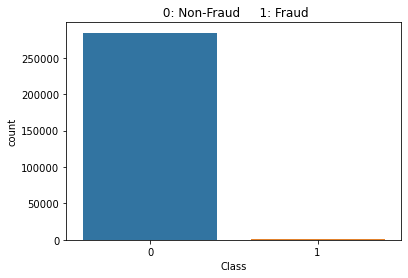

In [14]:
sns.countplot(x = "Class",data = df)
plt.title(" 0: Non-Fraud     1: Fraud")

Text(0.5, 1.0, 'Distribution of Amount')

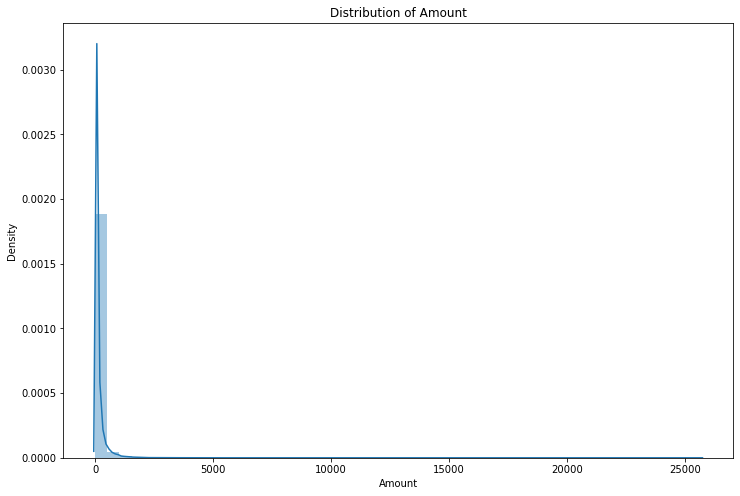

In [15]:
plt.figure(figsize = (12,8))
sns.distplot(df['Amount'])
plt.title("Distribution of Amount")


Text(0.5, 1.0, ' Distribution of transaction time')

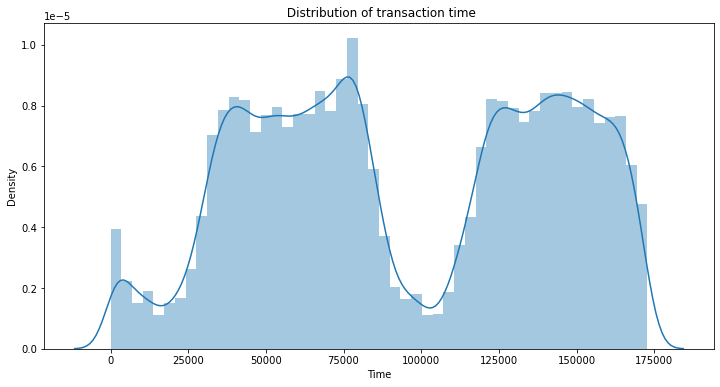

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(df['Time'],kde = True)
plt.title(" Distribution of transaction time")

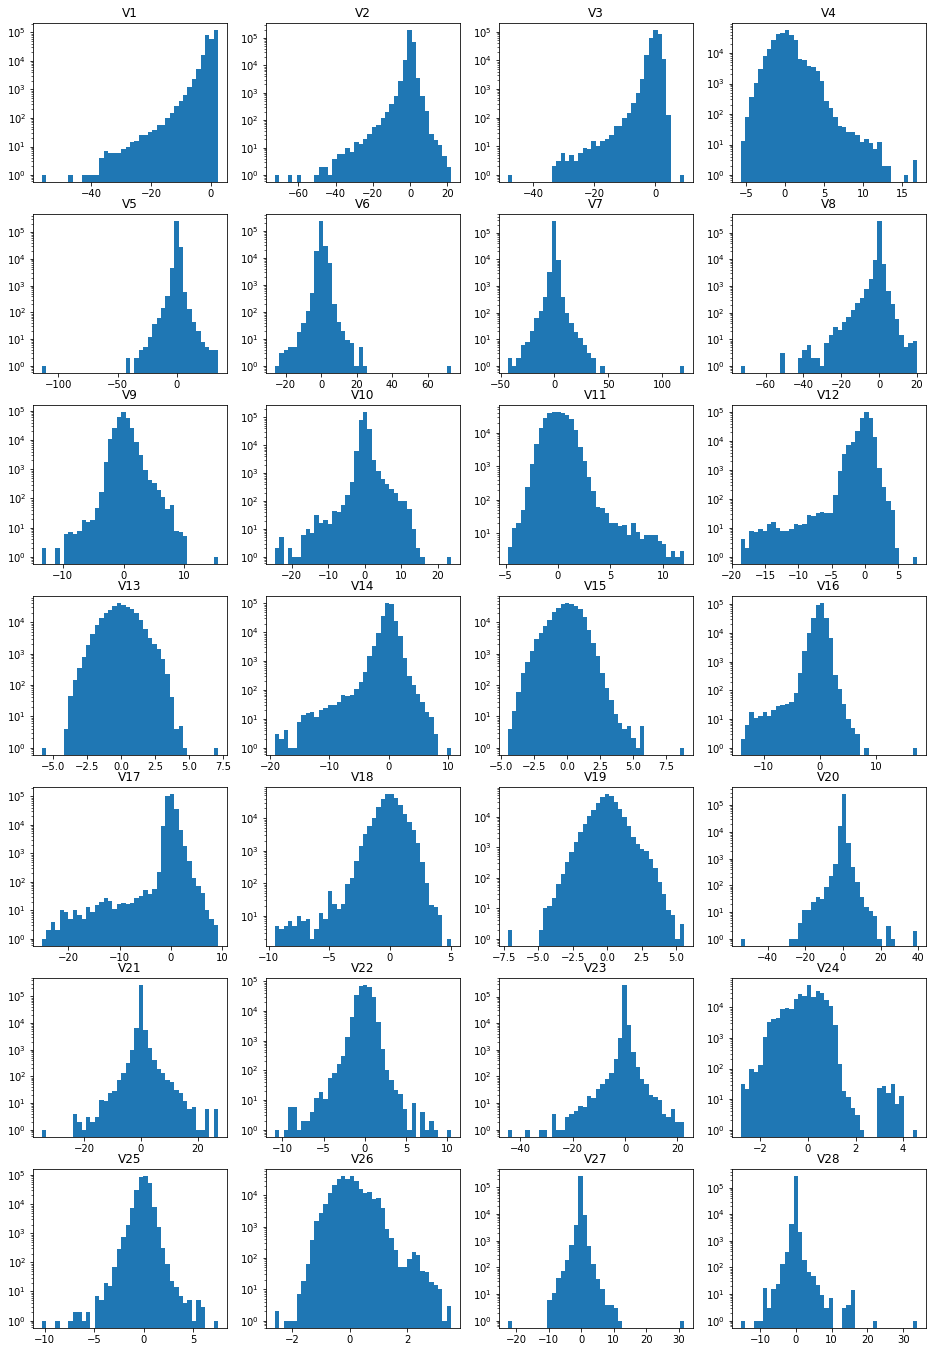

In [17]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize = (16,24))

for i in range(1,29):
    
    m=(i-1)//4
    n=(i-1)%4
    col = 'V'+str(i)
    ax[m,n].hist(df[col],bins=40)
    ax[m,n].set_title(col)
    ax[m,n].set_yscale('log')
    

## Bivariate Analysis

Text(0.5, 1.0, 'Amount vs Class')

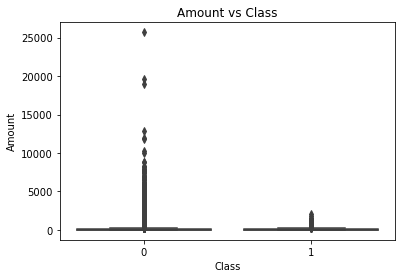

In [96]:
#class vs amount

sns.boxplot(x = 'Class',y = 'Amount',data = df)
# plt.ylim(0,1000)
plt.title("Amount vs Class")

In [99]:
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [100]:
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

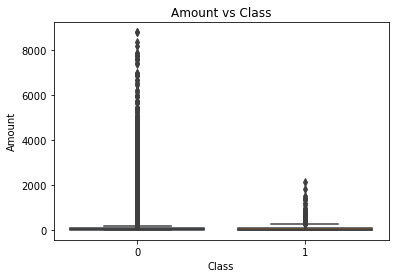

In [101]:
sns.boxplot(x = 'Class',y = 'Amount',data = df)
plt.title("Amount vs Class")

In [112]:
#AMOUNT VS TIME Distribution

data_new = df
timedelta = pd.to_timedelta(data_new['Time'],unit = 's')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour']= (timedelta.dt.components.hours).astype(int)

Text(0.5, 1.0, 'Amount by Minutes of Frauds and Normal Transactions')

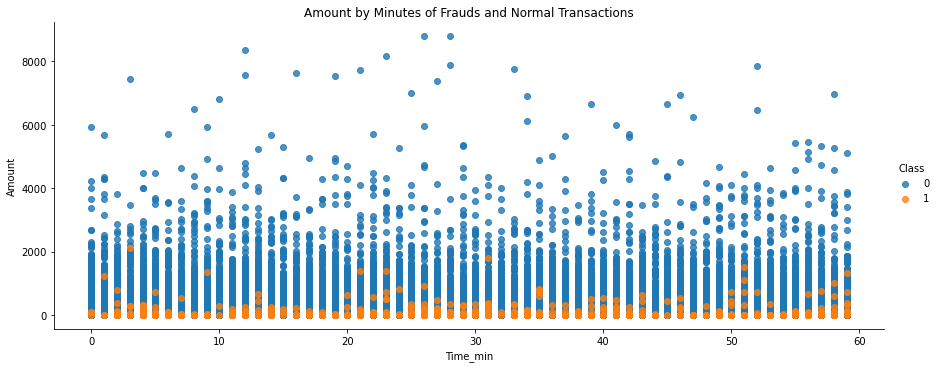

In [114]:
ax = sns.lmplot(y = 'Amount', x='Time_min',fit_reg=False, aspect = 2.5, data = data_new, hue='Class')
plt.title("Amount by Minutes of Frauds and Normal Transactions")

Text(0.5, 1.0, 'Amount by hours of Frauds and Normal Transactions')

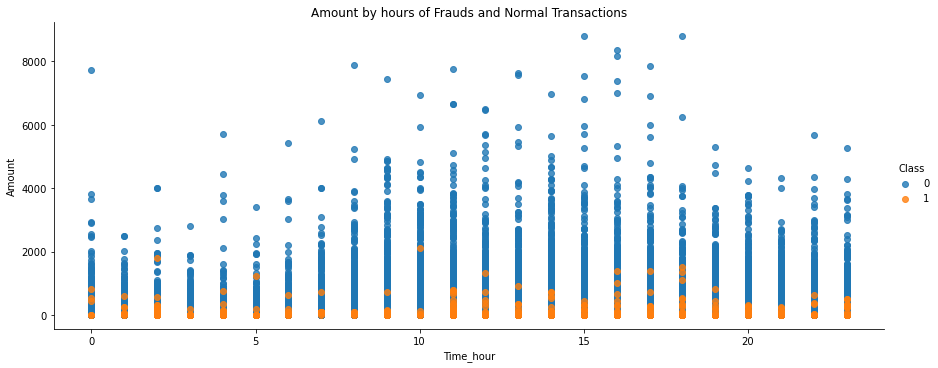

In [120]:
ax = sns.lmplot(y = 'Amount',x = 'Time_hour',fit_reg=False, aspect = 2.5,data = data_new, hue = 'Class')
plt.title("Amount by hours of Frauds and Normal Transactions")

In [121]:
# THIS SHOWS THAT THERE IS NOT PARTICULAR TIME WHEN FRAUDS ARE 
#PREVALENT DURING THE DAY. THEY WORK HARD BOTH DURING THE DAY AND THE NIGHT

(-1.0, 25.0)

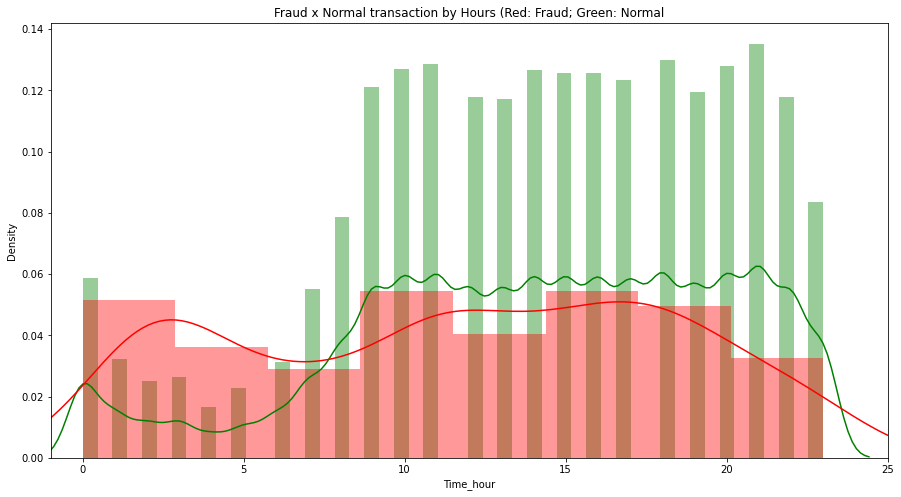

In [128]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal transaction by Hours (Red: Fraud; Green: Normal',fontsize=12)
plt.xlim([-1,25])

In [139]:
#data_new[(data_new['Class']==1) & (data_new['Amount']>500)]

## DATA Processing

In [141]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis = 1, inplace = True)

In [142]:
df.drop(['Time_min','Time_hour'],axis = 1, inplace=True)

In [143]:
scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'],axis=1,inplace=True)

df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting data using stratified k fold cross validation
what is does is that : it breaks data into k datasets and each set has 
same proportion of classes. This way we handel the imbalanced dataset we have
here

In [147]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state = None, shuffle=False)

for train_index, test_index in sss.split(X,y):
    print("Train: ", train_index, "Test :", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)



    
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest)) 

Train:  [ 30442  30473  30496 ... 284796 284797 284798] Test : [    0     1     2 ... 57016 57017 57018]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [ 30442  30473  30496 ... 113962 113963 113964]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [ 80757  81183  81606 ... 170942 170943 170944]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [150644 150651 150657 ... 227860 227861 227862]
Train:  [     0      1      2 ... 227860 227861 227862] Test : [212511 212639 213087 ... 284796 284797 284798]
[0.99827072 0.00172928]
[0.99827946 0.00172054]


## Making dataset balanced

In [151]:
df = df.sample(frac=1) #SHUFFLES/RANDOMIZES whole data(frac = 1) and return

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac = 1, random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
117370,-0.216741,1.179423,1.197537,-1.497934,1.589476,0.738369,-1.635252,0.646382,-0.221769,-0.634667,...,-0.057516,-0.148564,-0.404849,-0.193631,0.195319,0.778886,-0.322996,0.031643,0.088585,0
143731,3.057155,-2.207631,3.259076,-5.436365,3.684737,-3.066401,-0.671323,-3.696178,1.822272,-3.049653,...,0.808336,0.920899,0.037675,0.026754,-0.791489,0.176493,-0.136312,1.087585,0.373834,1
277826,-0.244969,-0.221098,1.278440,-0.782174,-0.142089,0.490548,-1.339741,0.688726,0.154559,-0.259054,...,-0.255750,0.387791,1.113430,-0.139538,-0.167357,-0.718741,-0.191417,0.139633,0.203264,0
44556,-0.293460,-4.566342,3.353451,-4.572028,3.616119,-2.493138,-1.090000,-5.551433,0.447783,-2.424414,...,-0.249128,2.674466,-0.020880,-0.302447,-0.086396,-0.516060,-0.295102,0.195985,0.141115,1
226814,9.021101,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,-0.338707,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,1


In [152]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


In [154]:
fraud_df

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
192584,4.758944,-2.434004,3.225947,-6.596282,3.593161,-1.079452,-1.739741,-0.047420,0.301424,-1.779434,...,-0.280533,-0.035491,-0.419178,0.157436,-0.714849,0.468859,-0.348522,0.420036,-0.327643,1
58761,-0.293460,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.171541,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1
77099,-0.237563,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.338598,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,1
10497,-0.254472,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,1
241445,-0.157909,-3.818214,2.551338,-4.759158,1.636967,-1.167900,-1.678413,-3.144732,1.245106,-1.692541,...,0.164453,0.837685,0.761712,-0.417694,-0.469712,-0.225934,0.586415,-0.348107,0.087777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31002,1.253494,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,1
150665,2.622275,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,...,-0.081220,1.909032,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,1
81186,0.330352,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,-1.977593,...,-0.141533,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,1
83297,4.153158,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,-1.233987,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,1


## Correlation Heat Map

In [158]:
#The best correlation coefficient to use depends on the specific data set and 
# the research question. If the data is normally distributed and you are 
# interested in the linear relationship between the variables, then the Pearson 
# correlation coefficient is a good choice. If the data is not normally 
# distributed or you are interested in the monotonic relationship between the 
# variables, then the Spearman correlation coefficient is a good choice.

Text(0.5, 1.0, 'Imbalanced Correlation Matrix \n (to be used for references)')

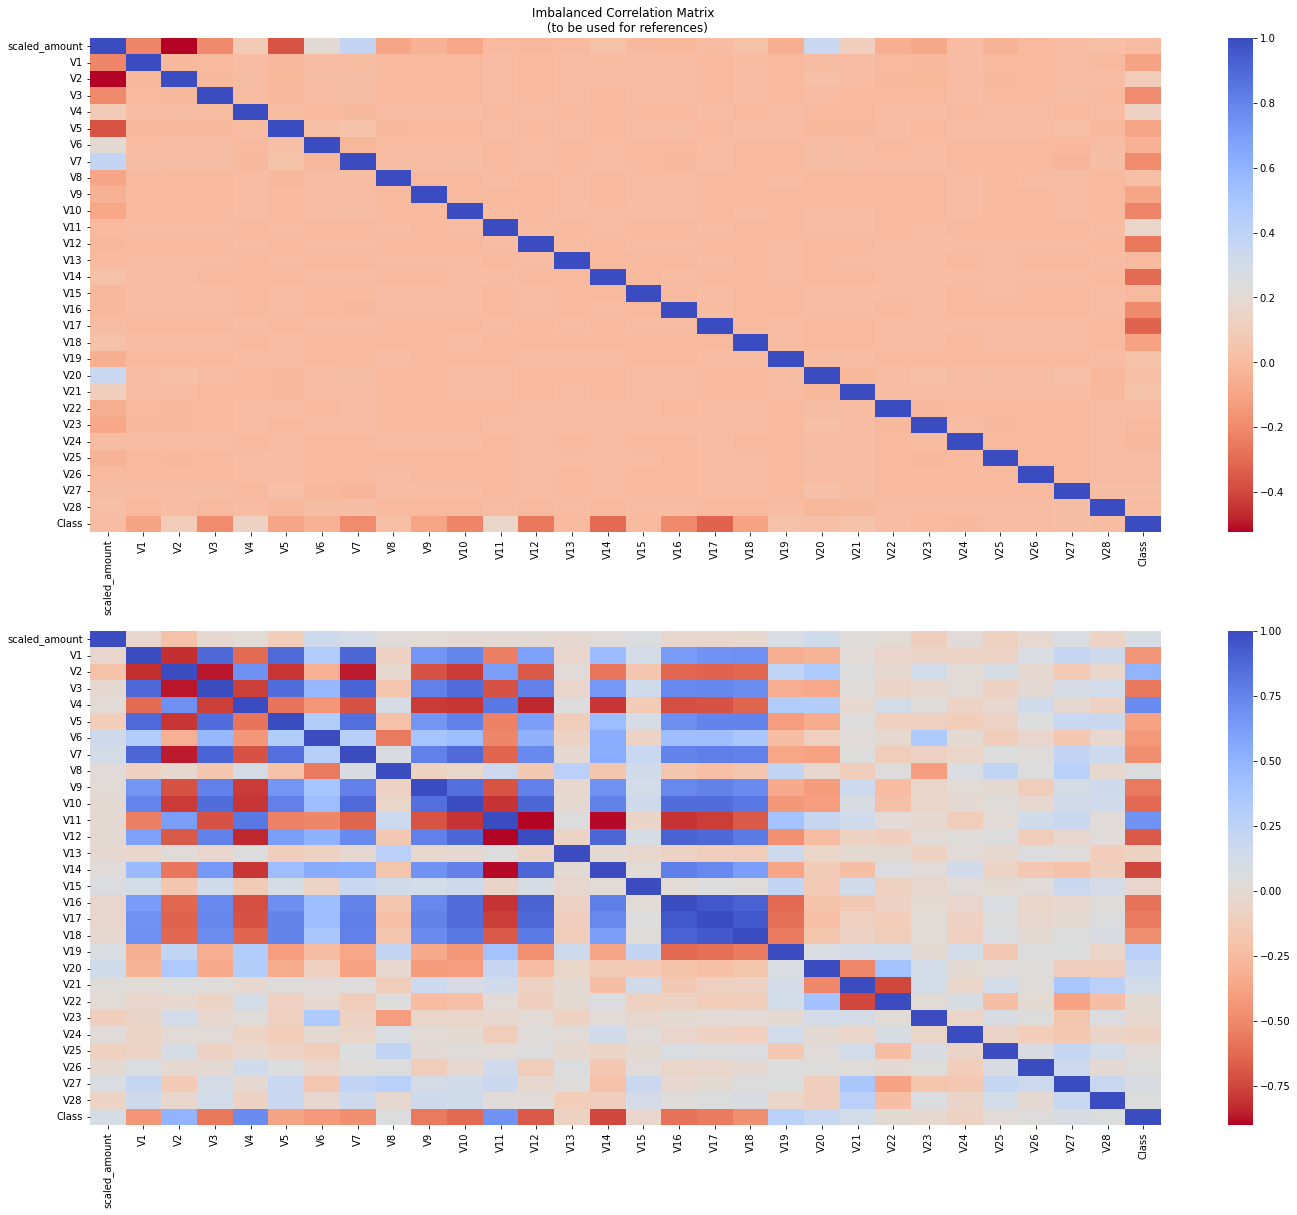

In [162]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (not to be used for references)")

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax2)
ax1.set_title("Imbalanced Correlation Matrix \n (to be used for references)")